# Predictive Analytics - BAN-210 Final Project

## Fuel Economy 





###  Problem Statement

In this project I am analysing U.S. automobile fuel efficiency from the year 1984 to 2022.It is vital to understand how the automobile fuel efficiency has improved over time. Are there any other interesting insights or trends?


## Let's see what's inside the data
### Data understanding
In this project, there is dataset that contains fuel efficiency performance metrics, measured in **miles per gallon (MPG)** over time. The data is courtesy of the U.S. Department of Energy and the US Evironmental Protection Agency. The dataset also contains several features and attributes of the automobiles listed, thereby providing the opportunity to summarize and group data to determine which groups tend to have better fuel efficiency historically and how this has changed over the years.

- Dataset link: http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip 
- Metatdata link:  http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

### Libraries used 

In [ ]:
pip install ggplot

In [18]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display
from functools import reduce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings; warnings.simplefilter('ignore')# suppress all warning messages

# Essential for matplotlib graphs in the notebook
%matplotlib inline

In [26]:
# Reading the file  
vehicles = pd.read_csv("Data/vehicles.csv")


### Exploring the dataset


In [27]:
# Let's look at the data
display(vehicles.head())
display(vehicles.index)
display(vehicles.columns)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


RangeIndex(start=0, stop=43921, step=1)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [28]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43921 entries, 0 to 43920
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43921 non-null  float64
 1   barrelsA08       43921 non-null  float64
 2   charge120        43921 non-null  int64  
 3   charge240        43921 non-null  float64
 4   city08           43921 non-null  int64  
 5   city08U          43921 non-null  float64
 6   cityA08          43921 non-null  int64  
 7   cityA08U         43921 non-null  float64
 8   cityCD           43921 non-null  float64
 9   cityE            43921 non-null  float64
 10  cityUF           43921 non-null  float64
 11  co2              43921 non-null  int64  
 12  co2A             43921 non-null  int64  
 13  co2TailpipeAGpm  43921 non-null  float64
 14  co2TailpipeGpm   43921 non-null  float64
 15  comb08           43921 non-null  int64  
 16  comb08U          43921 non-null  float64
 17  combA08     

### Descriptive analysis


In [67]:
#let's see the descriptive statistics of the vehicles data
vehicles.describe().round(2)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43921.00,43921.00,43921.0,43921.00,43921.00,43921.00,43921.0,43921.00,43921.00,43921.00,...,43921.00,43921.00,43921.00,43921.00,43921.00,43921.00,43921.00,43921.00,43921.00,43921.00
mean,17.10,0.22,0.0,0.07,18.71,7.11,0.8,0.67,0.00,0.50,...,23.69,1.06,34.84,1.30,2002.76,-4360.53,0.01,0.25,0.25,0.25
std,4.69,1.14,0.0,0.76,8.87,12.82,6.2,6.09,0.04,4.86,...,12.62,8.74,12.12,8.85,11.76,3702.19,0.31,3.62,3.50,3.54
min,0.06,0.00,0.0,0.00,6.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1984.00,-32500.00,0.00,0.00,0.00,0.00
25%,14.33,0.00,0.0,0.00,15.00,0.00,0.0,0.00,0.00,0.00,...,18.42,0.00,28.00,0.00,1992.00,-6500.00,0.00,0.00,0.00,0.00
50%,16.48,0.00,0.0,0.00,17.00,0.00,0.0,0.00,0.00,0.00,...,21.70,0.00,33.40,0.00,2004.00,-4250.00,0.00,0.00,0.00,0.00
75%,19.39,0.00,0.0,0.00,21.00,16.04,0.0,0.00,0.00,0.00,...,26.07,0.00,39.49,0.00,2013.00,-2000.00,0.00,0.00,0.00,0.00
max,47.09,18.31,0.0,15.30,150.00,150.20,145.0,145.08,5.35,122.00,...,224.80,207.26,187.10,173.14,2022.00,6500.00,9.60,97.00,81.00,88.00


In [45]:
#Columns with null values
vehicles.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            290
displ                288
drive               1186
engId                  0
eng_dscr           16579
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD              0
highwayE               0


In [29]:
# Rows and columns in the dataset
print("Number of rows is: {0}".format(len(vehicles)))
print("Number of columns is {0}".format(len(vehicles.columns)))

Number of rows is: 43921
Number of columns is 83


In [30]:
# Ho many years of data is given
len(pd.unique(vehicles.year))

39

In [31]:
# The first and last years in the data
print("First year is: {0}".format(min(vehicles.year)))
print("Last year is : {0}".format(max(vehicles.year)))

First year is: 1984
Last year is : 2022


In [33]:
# Commonly used types of fuel
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     29037
Premium Gasoline     13205
Diesel                1203
Electricity            287
Midgrade Gasoline      129
Natural Gas             60
Name: fuelType1, dtype: int64

In [34]:
# Count of automatic and manual transmissions cars
# A = Automatic
# M = Manual
vehicles_transmission = vehicles.copy()
vehicles_transmission['trany2'] = vehicles_transmission.trany.str[0]
pd.value_counts(vehicles_transmission.trany2)

A    30904
M    13006
Name: trany2, dtype: int64

In [95]:
#Lets make a new set for corealtion

vehicles_corr=vehicles[['city08','co2TailpipeGpm', 'comb08','highway08', 'cylinders', 'displ', 'fuelCost08', 'UHighway','youSaveSpend', 'UCity']]
vehicles_corr.head()

,city08,co2TailpipeGpm,comb08,highway08,cylinders,displ,fuelCost08,UHighway,youSaveSpend,UCity
0,19,423.190476,21,25,4.0,2.0,2250,35.0000,-2500,23.3333
1,9,807.909091,11,14,12.0,4.9,4300,19.0000,-12750,11.0000
2,23,329.148148,27,33,4.0,2.2,1750,47.0000,0,29.0000
3,10,807.909091,11,12,8.0,5.2,4300,16.6667,-12750,12.2222
4,17,467.736842,19,23,4.0,2.2,3050,32.0000,-6500,21.0000


### Correlation between various features of vehicle and UCity(miles per gallon)

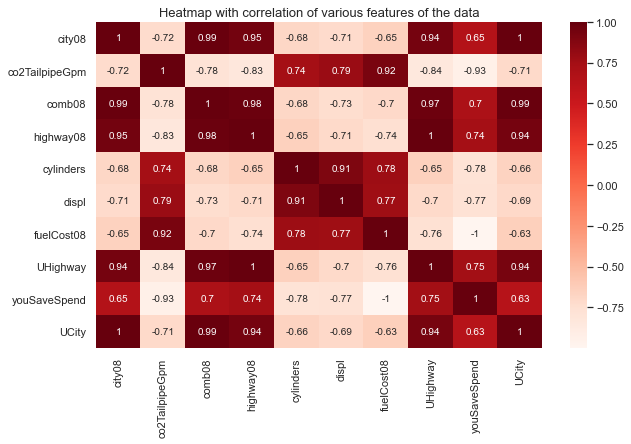

In [96]:
# Let's see the correlations between the Ucity and other featues of the car.
plt.figure(figsize=(10,6))
sns.heatmap(vehicles_corr.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap with correlation of various features of the data',
         fontsize=13)
plt.show()

#### Summary till now: 
- Years count **39** years starting from **1984** to **2022**.
-  **Regular Gasoline** is the most commonly used fuel type then **Premuim Gasoline**
-**Natural Gas** is the least used.
- There are automatic transmissions double of manual transmissions.

Correlation:
- Ucity have high or strong positive correlation with these selected features such as - city08,comb08,highway08,Uhighway and yousavespend.
- Ucity have moderate to strong correlation with theese features but in negative -co2tailppegpm,cylinders,displ, fuelcost08.


### Univariate analysis



['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota', 'BMW', 'Mercedes-Benz', 'Nissan', 'Volkswagen', 'Porsche']


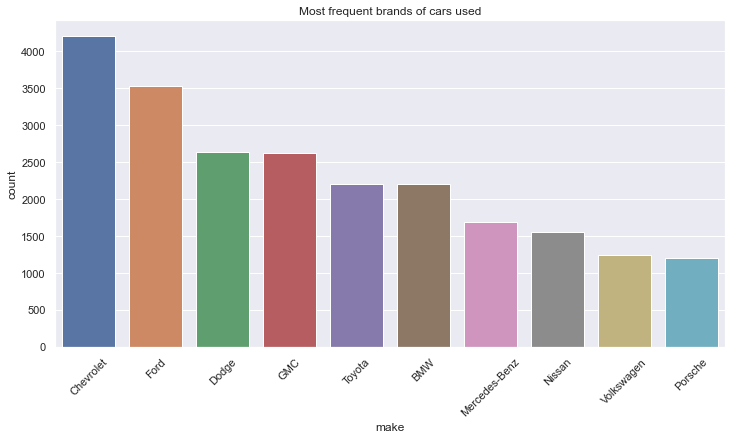

In [377]:
# Counts of each brands or make
mostfreqbrands=vehicles["make"].value_counts()[:10].index.tolist()
print(mostfreqbrands)
vehicles1=vehicles[np.isin(vehicles, mostfreq).any(axis=1)]
plt.figure(figsize=(12,6))
plt.title('Most frequent brands of cars used')
sns.countplot(x = "make", data=vehicles1,order = vehicles1['make'].value_counts().index)
t = plt.xticks(rotation=45)


['Compact Cars', 'Subcompact Cars', 'Midsize Cars', 'Large Cars', 'Standard Pickup Trucks', 'Two Seaters', 'Sport Utility Vehicle - 4WD', 'Small Station Wagons', 'Sport Utility Vehicle - 2WD', 'Minicompact Cars']


<AxesSubplot:title={'center':'Most frequent vlass of cars used'}, xlabel='count', ylabel='VClass'>

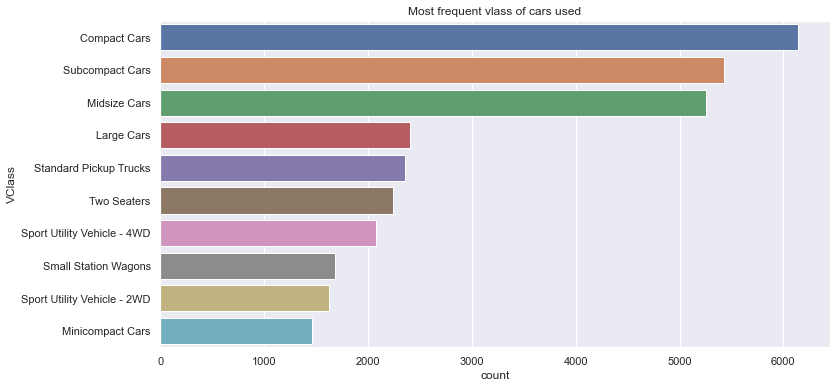

In [75]:
# Counts of each vclass
mostfreqvclass=vehicles["VClass"].value_counts()[:10].index.tolist()
print(mostfreqvclass)
vehiclesc=vehicles[np.isin(vehicles, mostfreqvclass).any(axis=1)]
plt.figure(figsize=(12,6))
plt.title('Most frequent class of cars used')
sns.countplot(y = "VClass", data=vehiclesc,order = vehiclesc['VClass'].value_counts().index)



['Regular', 'Premium', 'Gasoline or E85', 'Diesel', 'Electricity', 'Midgrade', 'Premium or E85', 'Premium and Electricity', 'Regular Gas and Electricity', 'CNG']


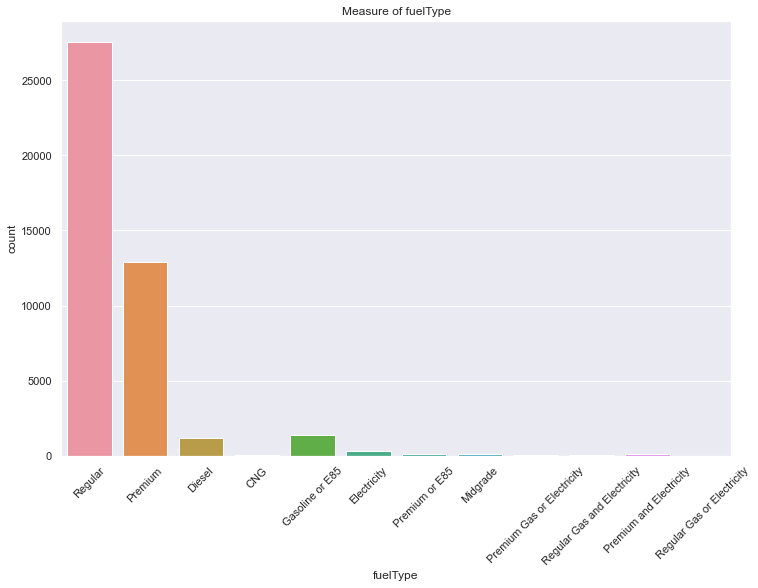

In [174]:
# Counts of fuelType1
mostf=vehicles["fuelType"].value_counts()[:10].index.tolist()
print(mostf)
vehicles2=vehicles[np.isin(vehicles, mostf).any(axis=1)]
plt.figure(figsize=(12,8))
plt.title('Measure of fuelType')
sns.countplot(x = "fuelType", data=vehicles2)
t = plt.xticks(rotation=45)


['Front-Wheel Drive', 'Rear-Wheel Drive', '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', '4-Wheel Drive', '2-Wheel Drive', 'Part-time 4-Wheel Drive']


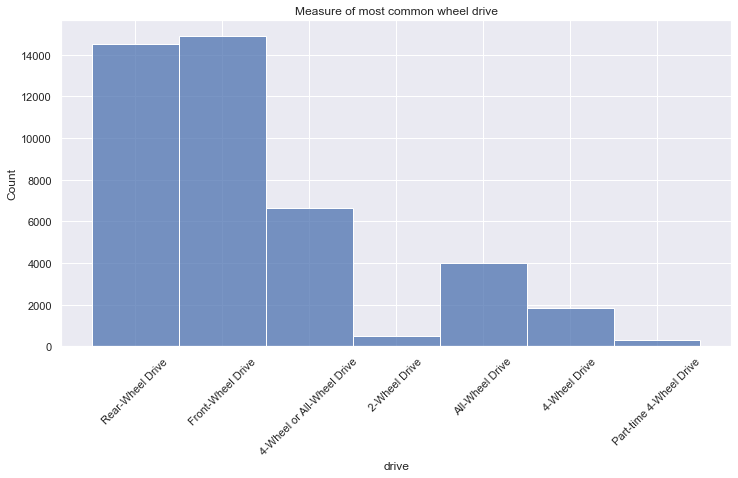

In [175]:
# Counts of common wheel drive
mostf=vehicles["drive"].value_counts()[:10].index.tolist()
print(mostf)
vehiclesf=vehicles[np.isin(vehicles, mostf).any(axis=1)]
plt.figure(figsize=(12,6))
plt.title('Measure of most common wheel drive')
sns.histplot(x = "drive", data=vehiclesf)
t = plt.xticks(rotation=45)


### Exploring numerical features by range and distribution

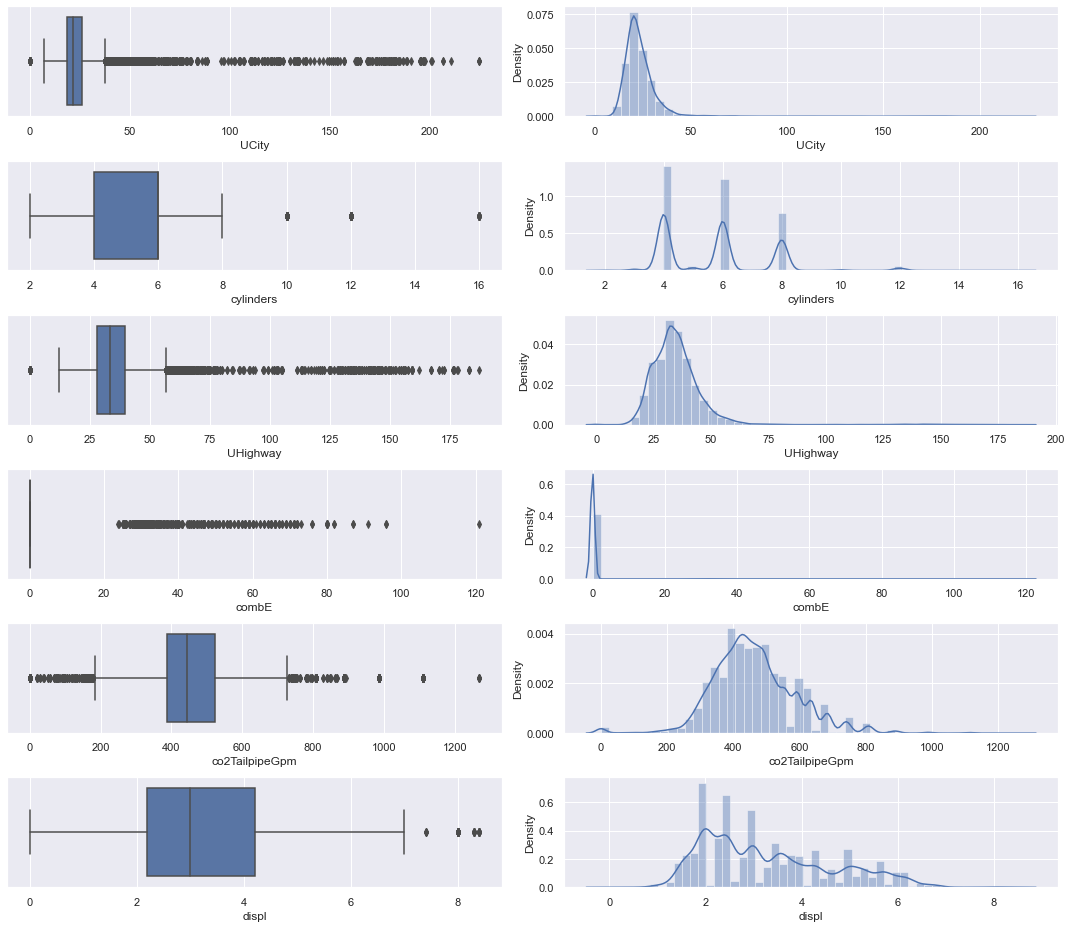

In [85]:

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= vehicles["UCity"], ax = ax[0,0])
sns.distplot(vehicles['UCity'], ax = ax[0,1])

sns.boxplot(x= vehicles["cylinders"], ax = ax[1,0])
sns.distplot(vehicles['cylinders'], ax = ax[1,1])

sns.boxplot(x= vehicles["UHighway"], ax = ax[2,0])
sns.distplot(vehicles['UHighway'], ax = ax[2,1])

sns.boxplot(x= vehicles["combE"], ax = ax[3,0])
sns.distplot(vehicles['combE'], ax = ax[3,1])

sns.boxplot(x= vehicles["co2TailpipeGpm"], ax = ax[4,0])
sns.distplot(vehicles['co2TailpipeGpm'], ax = ax[4,1])

sns.boxplot(x= vehicles["displ"], ax = ax[5,0])
sns.distplot(vehicles['displ'], ax = ax[5,1])

plt.tight_layout()

### Bivariate analysis

#### Unique model counts increased over the years

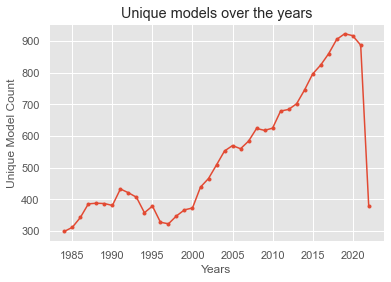

In [52]:

with plt.style.context('ggplot'):
    plt.plot(vehicles.groupby('year')['model'].apply(lambda x: len(set(x))), '.-')
    plt.title('Unique models over the years')
    plt.xlabel('Years')
    plt.ylabel('Unique Model Count')

#### Change in Ucity over the years.

<AxesSubplot:title={'center':'Change in UCity over the years'}, xlabel='year', ylabel='UCity'>

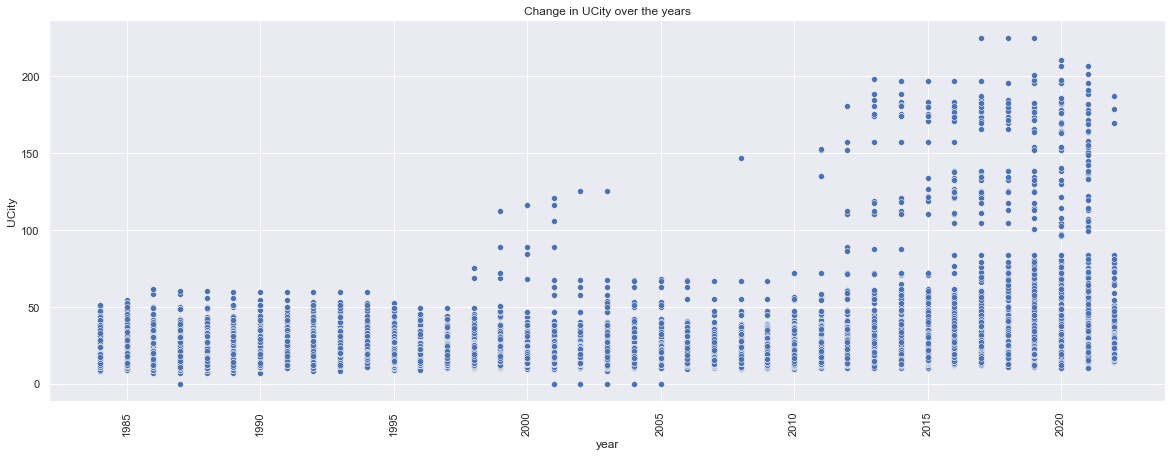

In [98]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('Change in UCity over the years')
sns.scatterplot(x='year', y='UCity', data=vehicles)

<AxesSubplot:xlabel='displ', ylabel='UCity'>

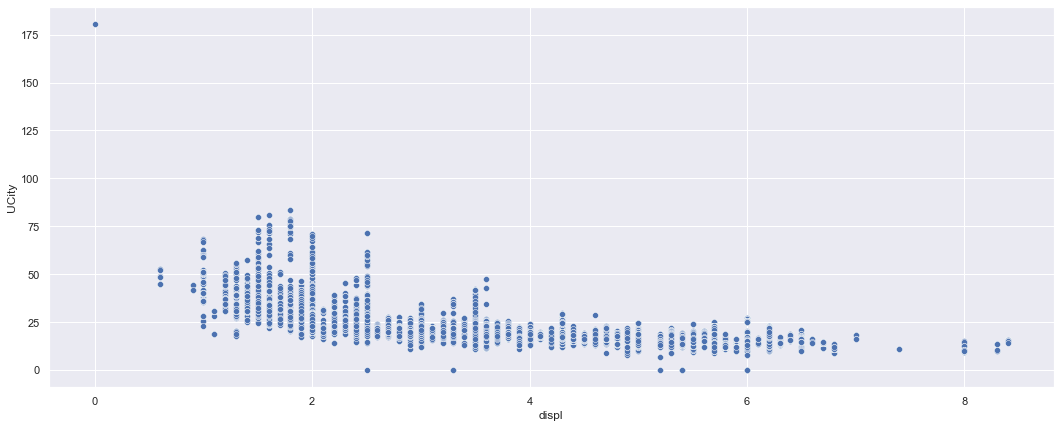

In [178]:
#bivariate analysis of ucity and displacement
plt.figure(figsize=(18,7))
sns.scatterplot(y='UCity', x='displ', data=vehicles)

<AxesSubplot:xlabel='make', ylabel='UCity'>

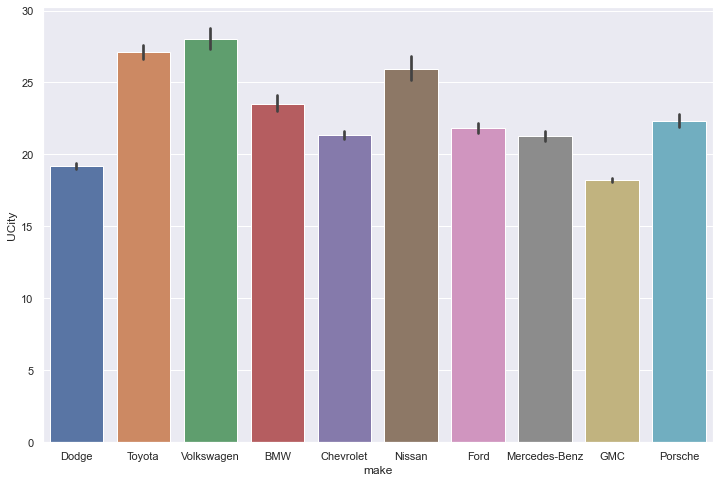

In [419]:
plt.figure(figsize=(12,8))
sns.barplot(x='make', y='UCity', data=vehicles1)

<function matplotlib.pyplot.show(close=None, block=None)>

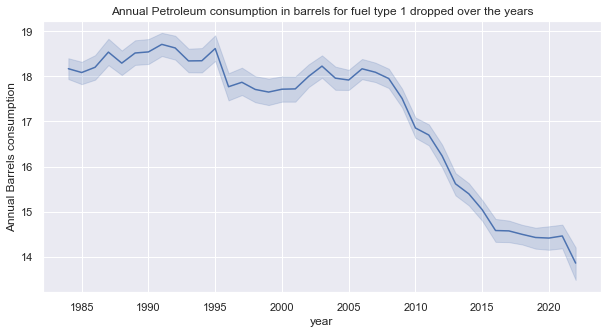

In [180]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='barrels08', data=vehicles)
plt.title('Annual Petroleum consumption in barrels for fuel type 1 dropped over the years')
plt.ylabel('Annual Barrels consumption')
plt.show

### Some additonal exploration for visualisations

In [101]:
def plotvar(consider, style='ggplot', size=(15, 7)):
    linestyles=['.-', 'o-', '^-', '-.']
    cycle_length=8
    with plt.style.context(style):
        plt.figure(figsize=size)
        count = 0
        for name, group in vehicles.groupby(consider):
            temp = list(sorted(list(Counter(group['year']).items()), key=lambda x: x[0]))
            x, y = [i[0] for i in temp], [i[1] for i in temp]
            linestyle = linestyles[int(count / cycle_length)]
            plt.plot(x, y, linestyle, label=name)
            count += 1
        plt.xlabel('year')
        plt.ylabel('Count')
        plt.title('Evolution of "{}" over the years'.format(consider))
        plt.legend(bbox_to_anchor=(1.3, 1.))

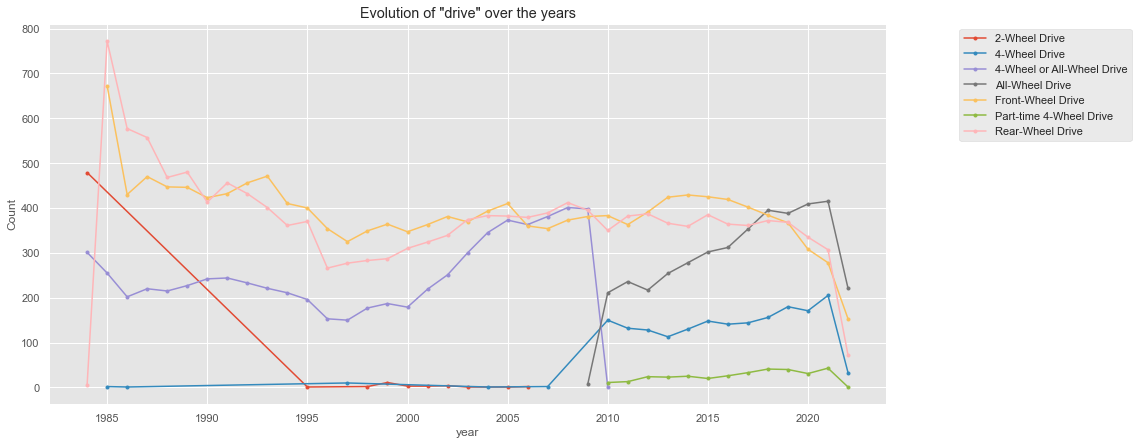

In [105]:
from collections import Counter
plotvar('drive')

Text(0.5, 1.0, 'City MPG trend for fule type 2')

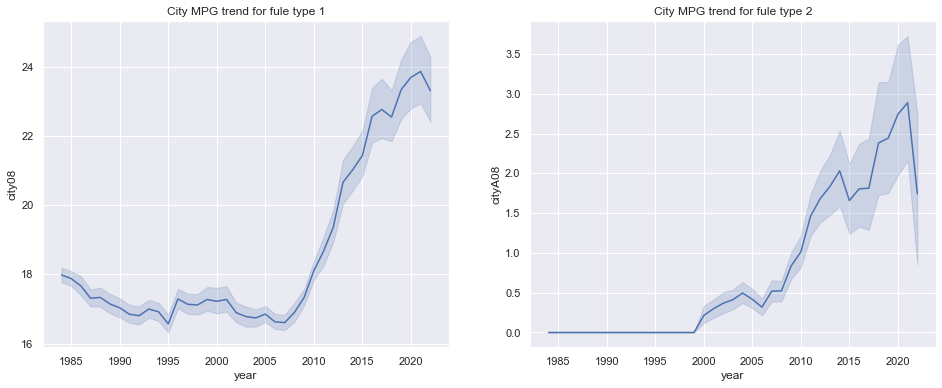

In [131]:
#comparing Ucity changed over time for fueltype 1 and fueltype 2

fig, ax =plt.subplots(1,2,figsize=(16,6))

sns.lineplot(x='year', y='city08', data=vehicles,ax=ax[0]).set_title('City MPG trend for fule type 1')
sns.lineplot(x='year', y='cityA08', data=vehicles,ax=ax[1]).set_title('City MPG trend for fule type 2')


##  Data preparation 
### Cleaning data

Lets handle missing values, outliers and mixed types in the dataset. There are some features which areirrekevant for the analysis and model training. After evaluation of useful columns, the irelevant features wil be dropped from the training dataset.


In [181]:
# Creating a copy for data cleaning and training set 
vehicles_clean = vehicles.copy()

# Check columns which have mixed types.
# From the warning we get when loading the data, we see that columns with mixed types are at index [73,74,76]
column_names = vehicles.columns.values
column_names[[73,74,76]]

array(['mfrCode', 'c240Dscr', 'c240bDscr'], dtype=object)

In [214]:
vehicles_clean.describe()

,barrels08,charge240,city08,city08U,cityCD,cityE,cityUF,co2,co2TailpipeGpm,comb08,...,range,rangeCity,rangeHwy,UCity,UHighway,year,youSaveSpend,phevCity,phevHwy,phevComb
count,39749.000000,39749.0,39749.000000,39749.000000,39749.0,39749.0,39749.0,39749.000000,39749.000000,39749.000000,...,39749.0,39749.0,39749.0,39749.000000,39749.000000,39749.000000,39749.000000,39749.0,39749.0,39749.0
mean,17.353421,0.0,17.791995,5.843684,0.0,0.0,0.0,101.637349,467.721552,20.121890,...,0.0,0.0,0.0,22.372486,33.838537,2002.175225,-4576.530227,0.0,0.0,0.0
std,4.319235,0.0,4.391269,9.331172,0.0,0.0,0.0,184.554969,116.406190,4.817131,...,0.0,0.0,0.0,5.957422,8.401597,11.618256,3582.237310,0.0,0.0,0.0
min,6.866875,0.0,6.000000,0.000000,0.0,0.0,0.0,-1.000000,185.145833,7.000000,...,0.0,0.0,0.0,0.000000,0.000000,1984.000000,-32500.000000,0.0,0.0,0.0
25%,14.330870,0.0,15.000000,0.000000,0.0,0.0,0.0,-1.000000,386.391304,17.000000,...,0.0,0.0,0.0,18.400000,28.000000,1992.000000,-6500.000000,0.0,0.0,0.0
50%,16.480500,0.0,17.000000,0.000000,0.0,0.0,0.0,-1.000000,444.350000,20.000000,...,0.0,0.0,0.0,21.439800,33.333300,2003.000000,-4250.000000,0.0,0.0,0.0
75%,19.388824,0.0,20.000000,15.000900,0.0,0.0,0.0,-1.000000,522.764706,23.000000,...,0.0,0.0,0.0,25.700000,39.000000,2012.000000,-2000.000000,0.0,0.0,0.0
max,47.087143,0.0,44.000000,36.873600,0.0,0.0,0.0,893.000000,1269.571429,48.000000,...,0.0,0.0,0.0,61.111100,76.923100,2022.000000,3750.000000,0.0,0.0,0.0


In [182]:
# Keeping only fueltype 1 for the analysis going forward and removing the hybrid atv type. 

criteria1 = vehicles_clean.fuelType1.isin(["Regular Gasoline","Premium Gasoline","Midgrade Gasoline"])
criteria2 = vehicles_clean.fuelType2.isnull()
criteria3 = vehicles_cleaning.atvType != "Hybrid"

vehicles_clean = vehicles_clean[criteria1 & criteria2 & criteria3]
vehicles_clean.shape

(39749, 83)

In [183]:
vehicles_clean.columns.values
#df = df.drop(df[<some boolean condition>].index)

array(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08',
       'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD',
       'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr',
       'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08',
       'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv',
       'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended',
       'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA',
       'VClass', 'year', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'mod

In [184]:
drop_columns = ['barrelsA08', 'eng_dscr', 'engId', 'createdOn', 'modifiedOn',
          'startStop', 'trans_dscr', 'rangeA', 'c240Dscr', 'c240bDscr', 'rangeHwyA', 'UCityA', 'UHighwayA', 
          'highwayA08U', 'rangeCityA', 'highwayA08', 'cityA08', 'cityA08U', 'co2A',
          'co2TailpipeAGpm', 'fuelType', 'combA08','combA08U', 'fuelCostA08', 'ghgScoreA','id','guzzler','charge120','tCharger','sCharger', 'charge240b', 'createdOn',]

# dropped irrelevant features
vehicles_clean.drop(drop_columns, axis=1, inplace=True)

In [185]:
vehicles_clean.shape

(39749, 52)

Text(0.5, 1.0, 'Outlier detection')

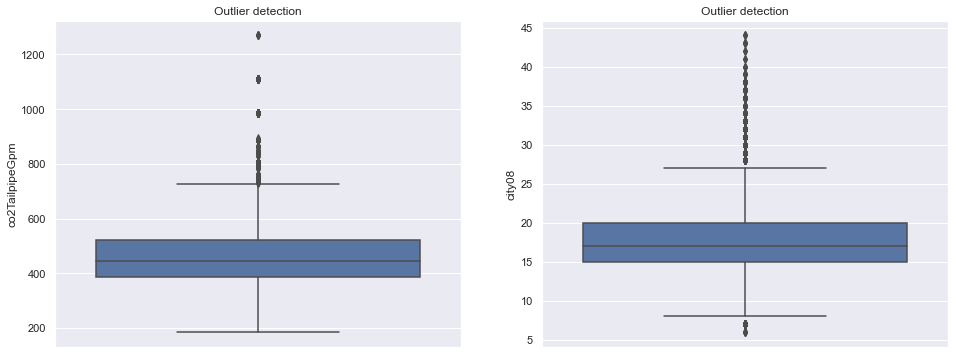

In [213]:
#Outliers detection by boxplot

fig, ax =plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y='co2TailpipeGpm', data=vehicles_clean,ax=ax[0]).set_title('Outlier detection')
sns.boxplot(y='city08', data=vehicles_clean,ax=ax[1]).set_title('Outlier detection')
#presence of significant outliers 

#### Missing values and outliers detection
In the dataset, missing data is represented with a **nan**.

-Some columns have -1 as not available.
-Need to convert every -1 to Nan.

-Sometimes outliers cannot be removed as it can affect training dataset. 

In [ ]:
# Convert all -1 to Nan for feature(feScore)
features=['feScore']
for i in features:
    vehicles_clean[i].replace([-1], [np.nan], inplace=True)

Text(0, 0.5, '# Missing values')

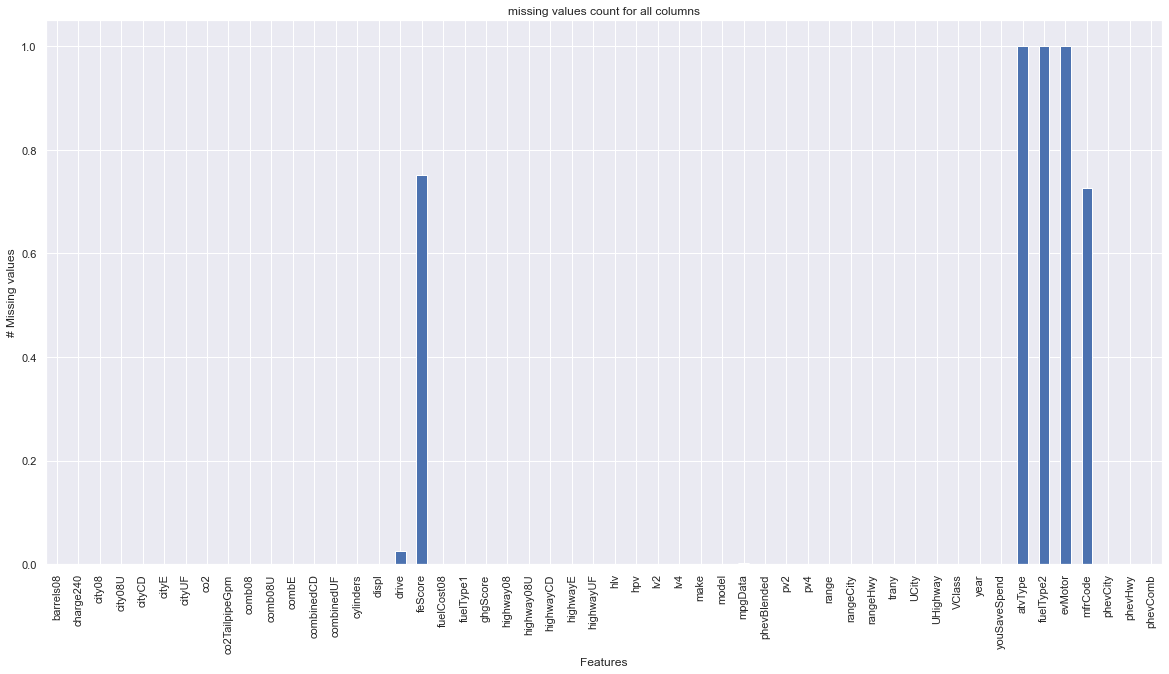

In [187]:
# Mising values
plt.clf()
a = vehicles_clean.isnull().sum()/len(vehicles_clean)
title = 'missing values count for all columns'
a.plot(title=title,kind='bar', figsize=(20,10))
plt.xlabel('Features')
plt.ylabel('# Missing values')

In [192]:
# Lets find the outliers which also has missing valuesmore than 25%
Vehicles_null = vehicles_clean.isnull().sum() / len(vehicles_clean)
missing_features = vehicles_null[pct_null > 0.25].index 
# Print all the outliers columns to be removed.  
pd.DataFrame(missing_features, columns=("Outlier columns",))

,Outlier columns
0,feScore
1,atvType
2,fuelType2
3,evMotor
4,mfrCode


In [193]:
# Remove the outlier columns from the dataset
vehicles_clean.drop(missing_features, axis=1, inplace=True)

In [194]:
vehicles_clean.head()

,barrels08,charge240,city08,city08U,cityCD,cityE,cityUF,co2,co2TailpipeGpm,comb08,...,rangeHwy,trany,UCity,UHighway,VClass,year,youSaveSpend,phevCity,phevHwy,phevComb
0,15.695714,0.0,19,0.0,0.0,0.0,0.0,-1,423.190476,21,...,0.0,Manual 5-spd,23.3333,35.0000,Two Seaters,1985,-2500,0,0,0
1,29.964545,0.0,9,0.0,0.0,0.0,0.0,-1,807.909091,11,...,0.0,Manual 5-spd,11.0000,19.0000,Two Seaters,1985,-12750,0,0,0
2,12.207778,0.0,23,0.0,0.0,0.0,0.0,-1,329.148148,27,...,0.0,Manual 5-spd,29.0000,47.0000,Subcompact Cars,1985,0,0,0,0
3,29.964545,0.0,10,0.0,0.0,0.0,0.0,-1,807.909091,11,...,0.0,Automatic 3-spd,12.2222,16.6667,Vans,1985,-12750,0,0,0
4,17.347895,0.0,17,0.0,0.0,0.0,0.0,-1,467.736842,19,...,0.0,Manual 5-spd,21.0000,32.0000,Compact Cars,1993,-6500,0,0,0


In [199]:
# Display the percentage of missing values in each feature
def missing_values_per(df):

    missing_vals = []
    missing_values_proportion =(df.isnull().sum()/len(df))
    print("Percentage of Missing Values")
    if np.max(missing_values_proportion.values) > 0.:
        for x in range(len(missing_values_proportion)):
            if(missing_values_proportion[x] > 0):
                missing_vals = missing_values_proportion.index[x]
                print("{} has {:.1f}% of data marked as NaNs".format(missing_vals, (missing_values_proportion[x]*100)))
    else:
        print("No features with missing values")
            
missing_values_per(vehicles_clean)

Percentage of Missing Values
cylinders has 0.0% of data marked as NaNs
displ has 0.0% of data marked as NaNs
drive has 2.6% of data marked as NaNs
mpgData has 0.2% of data marked as NaNs
trany has 0.0% of data marked as NaNs


In [200]:
#number of missing values
print('Cylinders:',vehicles_clean.cylinders.isnull().sum())
print('displ:',vehicles_clean.displ.isnull().sum())
print('trany:',vehicles_clean.trany.isnull().sum())

Cylinders: 3
displ: 2
trany: 2


In [201]:
# categorical columns datatype
vehicles_clean.dtypes[vehicles_cleaning.dtypes != 'int64'][vehicles_clean.dtypes != 'float64']

drive          object
fuelType1      object
make           object
model          object
mpgData        object
phevBlended      bool
trany          object
VClass         object
dtype: object

In [202]:
# Data type for each features with missing values.
features = ['cylinders','displ','drive','trany']
for f in features:
    print("{0}: {1}".format(f, vehicles_cleaning[f].dtype))

cylinders: float64
displ: float64
drive: object
trany: object


##### Imputation of numerical/Categorical  data 
Removing columns for less number of missing values or few outliers is not correct. So, we will impute all the missing values with mean, mode and median values.

In [204]:
# Impute numerical variables 
num_feat = ['cylinders','displ']

for feat in num_feat:
    vehicles_clean[feat] = vehicles_clean[feat].fillna(vehicles_clean[feat].median())

In [205]:
# Impute categorical variables
cat_feat = ['drive', 'trany']
for feat in cat_feat:
    vehicles_clean[feat] = vehicles_clean[feat].fillna(vehicles_clean[feat].mode()[0])

In [206]:
# recheck the the data for outliers
missing_values_per(vehicles_clean)

Percentage of Missing Values
mpgData has 0.2% of data marked as NaNs


In [208]:
display(vehicles_clean.shape)
display(vehicles_clean.info())

(39749, 47)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39749 entries, 0 to 43920
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   barrels08       39749 non-null  float64
 1   charge240       39749 non-null  float64
 2   city08          39749 non-null  int64  
 3   city08U         39749 non-null  float64
 4   cityCD          39749 non-null  float64
 5   cityE           39749 non-null  float64
 6   cityUF          39749 non-null  float64
 7   co2             39749 non-null  int64  
 8   co2TailpipeGpm  39749 non-null  float64
 9   comb08          39749 non-null  int64  
 10  comb08U         39749 non-null  float64
 11  combE           39749 non-null  float64
 12  combinedCD      39749 non-null  float64
 13  combinedUF      39749 non-null  float64
 14  cylinders       39749 non-null  float64
 15  displ           39749 non-null  float64
 16  drive           39749 non-null  object 
 17  fuelCost08      39749 non-null 

None

In [215]:
# Lets create a copy of the clean dataset
vehicles_new = vehicles_clean.copy()

Lets see some conlusions based on clean set of data for single fuel type and non hybrid make cars:

###  Which engine size type is most popular over the years?


In [378]:
# Group the data by year to calculate engine disp
group_year = vehicles_new.groupby(['year'])
average_year = group_year['displ'].agg([np.mean])
average_year['year'] = average_year.index


def plot_graph(df, aes_x, aes_y, x_lab='', y_lab='', title='', color='red', geom_type = 'line'):
         
    if geom_type =='line':
        print(ggplot(df, aes(aes_x, aes_y)) +\
        geom_line(color=color) + xlab(x_lab) + ylab(y_lab) + ggtitle(title))
    elif geom_type == 'point':
        print(ggplot(df, aes(aes_x, aes_y)) +\
        geom_point(color=color) + xlab(x_lab) + ylab(y_lab) + ggtitle(title)) 

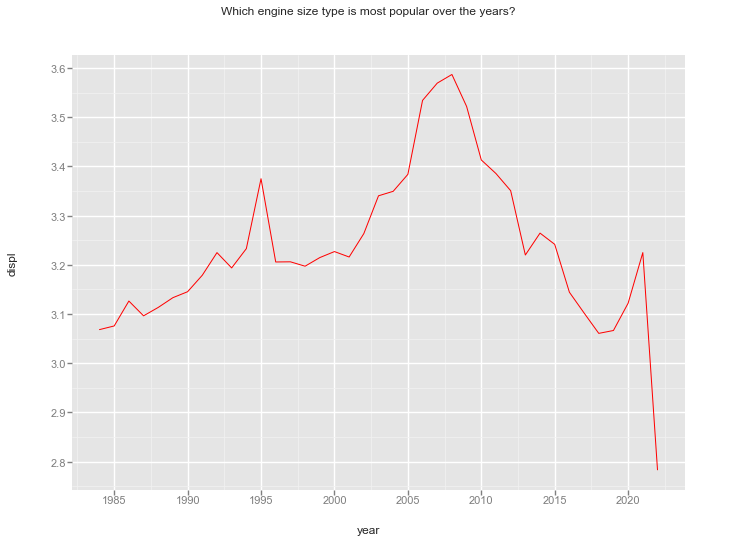

<ggplot: (144500401782)>


In [379]:
# Plot displacement against year
aes_x = 'year'
aes_y = 'mean'
x_lab = "year"
y_lab = "displ"
title = "Which engine size type is most popular over the years?"
plot_graph(average_year, aes_x, aes_y, x_lab, y_lab, title)

#### Answer
Displacement has started decreasing its popularity in 2008 that means more small cars with small engine types were used after 2008

### How does the size of a car engine affect its fuel consumption?

In [229]:
#Lets take two important featues - comb08 and displ 
pd.unique(vehicles_new.comb08)
pd.unique(vehicles_new.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.9])

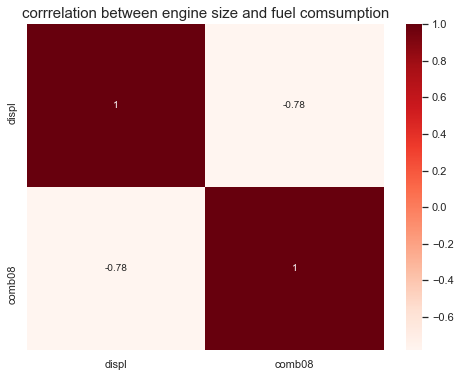

In [235]:
# Check corrrelation between displ and comb08 for single fuel vehicles
plt.figure(figsize=(8,6))

enginesize_fuelrelation = vehicles_new[['displ','comb08']]
sns.heatmap(enginesize_fuelrelation.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('corrrelation between engine size and fuel comsumption',fontsize=15)
plt.show()


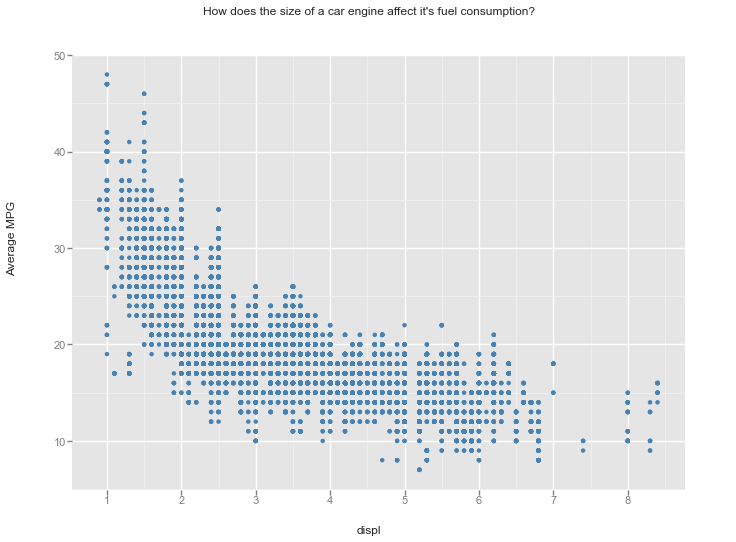

<ggplot: (144502306835)>


In [236]:
# Average MPG(Miles Per Gallon) for Engine Displacement 
aes_x = 'displ'
aes_y = 'comb08'
x_lab = "displ"
y_lab = "Average MPG"
title = "How does the size of a car engine affect it's fuel consumption?"
plot_graph(vehicles_new, aes_x, aes_y, x_lab, y_lab, title, geom_type='point')


#### Answer

There is a negative correlation between engine displ and fuel efficiency that means Small engine size cars are fuel effiecient.

## Model building

Target variable= Ucity

In [432]:
vehicles_final=vehicles_clean.copy()
vehicles_final.describe()

,barrels08,charge240,city08,city08U,cityCD,cityE,cityUF,co2,co2TailpipeGpm,comb08,...,range,rangeCity,rangeHwy,UCity,UHighway,year,youSaveSpend,phevCity,phevHwy,phevComb
count,39749.000000,39749.0,39749.000000,39749.000000,39749.0,39749.0,39749.0,39749.000000,39749.000000,39749.000000,...,39749.0,39749.0,39749.0,39749.000000,39749.000000,39749.000000,39749.000000,39749.0,39749.0,39749.0
mean,17.353421,0.0,17.791995,5.843684,0.0,0.0,0.0,101.637349,467.721552,20.121890,...,0.0,0.0,0.0,22.372486,33.838537,2002.175225,-4576.530227,0.0,0.0,0.0
std,4.319235,0.0,4.391269,9.331172,0.0,0.0,0.0,184.554969,116.406190,4.817131,...,0.0,0.0,0.0,5.957422,8.401597,11.618256,3582.237310,0.0,0.0,0.0
min,6.866875,0.0,6.000000,0.000000,0.0,0.0,0.0,-1.000000,185.145833,7.000000,...,0.0,0.0,0.0,0.000000,0.000000,1984.000000,-32500.000000,0.0,0.0,0.0
25%,14.330870,0.0,15.000000,0.000000,0.0,0.0,0.0,-1.000000,386.391304,17.000000,...,0.0,0.0,0.0,18.400000,28.000000,1992.000000,-6500.000000,0.0,0.0,0.0
50%,16.480500,0.0,17.000000,0.000000,0.0,0.0,0.0,-1.000000,444.350000,20.000000,...,0.0,0.0,0.0,21.439800,33.333300,2003.000000,-4250.000000,0.0,0.0,0.0
75%,19.388824,0.0,20.000000,15.000900,0.0,0.0,0.0,-1.000000,522.764706,23.000000,...,0.0,0.0,0.0,25.700000,39.000000,2012.000000,-2000.000000,0.0,0.0,0.0
max,47.087143,0.0,44.000000,36.873600,0.0,0.0,0.0,893.000000,1269.571429,48.000000,...,0.0,0.0,0.0,61.111100,76.923100,2022.000000,3750.000000,0.0,0.0,0.0


In [437]:
vehicles_cont = vehicles_final.copy()

In [438]:

cont_variables = ['barrels08', 'city08', 'city08U','co2', 'co2TailpipeGpm', 'comb08U', 
                  'comb08', 'highway08' , 'highway08U', 'UHighway','youSaveSpend'
                  ]
minVec = vehicles_cont[cont_variables].min().copy()
maxVec = vehicles_cont[cont_variables].max().copy()
vehicles_cont[cont_variables] = (vehicles_cont[cont_variables]-minVec)/(maxVec-minVec)
vehicles_cont.head()

,barrels08,charge240,city08,city08U,cityCD,cityE,cityUF,co2,co2TailpipeGpm,comb08,...,rangeHwy,trany,UCity,UHighway,VClass,year,youSaveSpend,phevCity,phevHwy,phevComb
0,0.219512,0.0,0.342105,0.0,0.0,0.0,0.0,0.0,0.219512,0.341463,...,0.0,Manual 5-spd,23.3333,0.455000,Two Seaters,1985,0.827586,0,0,0
1,0.574279,0.0,0.078947,0.0,0.0,0.0,0.0,0.0,0.574279,0.097561,...,0.0,Manual 5-spd,11.0000,0.247000,Two Seaters,1985,0.544828,0,0,0
2,0.132791,0.0,0.447368,0.0,0.0,0.0,0.0,0.0,0.132791,0.487805,...,0.0,Manual 5-spd,29.0000,0.611000,Subcompact Cars,1985,0.896552,0,0,0
3,0.574279,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.574279,0.097561,...,0.0,Automatic 3-spd,12.2222,0.216667,Vans,1985,0.544828,0,0,0
4,0.260591,0.0,0.289474,0.0,0.0,0.0,0.0,0.0,0.260591,0.292683,...,0.0,Manual 5-spd,21.0000,0.416000,Compact Cars,1993,0.717241,0,0,0


In [439]:
# fuelType1, 'make', 'VClass'
vehicles_cont=vehicles_cont.drop(['model'], axis=1)
vehicles_cont['make']=vehicles_final['make'].astype(str)
vehicles_cont = pd.get_dummies(vehicles_cont,prefix=['make'], columns = ['make'])
vehicles_cont = pd.get_dummies(vehicles_cont,prefix=['fuelType1'], columns = ['fuelType1'])
vehicles_cont = pd.get_dummies(vehicles_cont,prefix=['VClass'], columns = ['VClass'])
vehicles_cont = pd.get_dummies(vehicles_cont,prefix=['drive'], columns = ['drive'])
vehicles_cont = pd.get_dummies(vehicles_cont,prefix=['trany'], columns = ['trany'])



In [440]:
vehicles_cont.isnull().sum()

barrels08                                     0
charge240                                     0
city08                                        0
city08U                                       0
cityCD                                        0
cityE                                         0
cityUF                                        0
co2                                           0
co2TailpipeGpm                                0
comb08                                        0
comb08U                                       0
combE                                         0
combinedCD                                    0
combinedUF                                    0
cylinders                                     0
displ                                         0
fuelCost08                                    0
ghgScore                                      0
highway08                                     0
highway08U                                    0
highwayCD                               

In [443]:
vehicles_final1 =vehicles_cont.drop(['mpgData','charge240'],axis=1)

In [444]:
flot_type = vehicles_final1.select_dtypes(include=['float64'])
for i in vehicles_final1.columns.values:
    vehicles_final1[i] = vehicles_final1[i].astype('int64')


In [315]:
vehicles_final1.dtypes

barrels08                                    int64
city08                                       int64
city08U                                      int64
cityCD                                       int64
cityE                                        int64
cityUF                                       int64
co2                                          int64
co2TailpipeGpm                               int64
comb08                                       int64
comb08U                                      int64
combE                                        int64
combinedCD                                   int64
combinedUF                                   int64
cylinders                                    int64
displ                                        int64
fuelCost08                                   int64
ghgScore                                     int64
highway08                                    int64
highway08U                                   int64
highwayCD                      

In [466]:
model_vehicles=vehicles_final1.copy()

In [467]:
x = model_vehicles.loc[:, model_vehicles.columns != 'UCity']
y = model_vehicles.loc[:, model_vehicles.columns == 'UCity']

In [468]:
# Select only features which are relevant for the prediction

vehicle_model =model_vehicles.drop(['year', 'cityCD',
                                                 'cityE', 'cityUF', 'combE', 'combinedCD',
                                                 'highwayCD', 'highwayE', 'highwayUF', 'range',
                                                 'rangeCity', 'rangeHwy', 'phevCity', 
                                                 'hpv', 'lv2', 'lv4', 'pv2'],axis=1)

In [469]:
vehicle_model.shape

(39749, 229)

In [470]:
vehicle_model.columns

Index(['barrels08', 'city08', 'city08U', 'co2', 'co2TailpipeGpm', 'comb08',
       'comb08U', 'combinedUF', 'cylinders', 'displ',
       ...
       'trany_Automatic 6-spd', 'trany_Automatic 7-spd',
       'trany_Automatic 8-spd', 'trany_Automatic 9-spd', 'trany_Manual 3-spd',
       'trany_Manual 4-spd', 'trany_Manual 4-spd Doubled',
       'trany_Manual 5-spd', 'trany_Manual 6-spd', 'trany_Manual 7-spd'],
      dtype='object', length=229)

In [471]:
# Now seperate the dataset as response variable and feature variabes
target='UCity'

X = vehicle_model.drop(target, axis = 1)
Y = vehicle_model[target]

In [474]:
# Here we would also split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20)

In [475]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [476]:
X_train.shape

(31799, 245)

### Random Forest Model

In [498]:
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [499]:
# Print accuracy
print('Accuracy of Random forest on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of Random forest on test set: 0.71


In [500]:
# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]},index = ['Random Forest Baseline']))




In [501]:
accuracy_df

,r2,rmse
Decision Tree Baseline,0.99,0.62
Random Forest Baseline,0.99,0.62
Random Forest Baseline,0.98,0.79


### Decision tree Model

In [493]:
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor(criterion='mse',  max_depth=10)         
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9890199155813383

In [494]:
# Fit
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = pd.DataFrame(columns=('r2', 'rmse'))
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Decision Tree Baseline']))

In [495]:
accuracy_df

,r2,rmse
Decision Tree Baseline,0.99,0.62


Text(0, 0.5, 'predicted MPG')

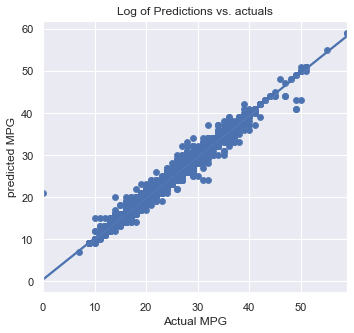

In [502]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])


sns.scatterplot(x = y_test['UCity'], y = y_pred, ax=ax1)
sns.regplot(x = y_test['UCity'], y=y_pred, ax=ax1)

ax1.set_title("Log of Predictions vs. actuals")
ax1.set_xlabel('Actual MPG')
ax1.set_ylabel('predicted MPG')


## Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- Used 10-fold Cross-Validation to train these models.
Models to evaluate are 
- Random Forest Model
- Decision tree Model

In [416]:
#setting kfold value 

from sklearn.model_selection import KFold

models=[]
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('CART', DecisionTreeRegressor()))

# now evaluate each model 
results = []
names = []
print("model: mean of score across 10 folds (std dev of score)")

for name, model in models:
    # --> split training dataset into 10 parts; train on 9 and test on 1; repeat for all combinations.
    kfold = KFold (n_splits=10);
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold);
    results.append(cv_results);
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

model: mean of score across 10 folds (std dev of score)
RF: 0.879116 (0.005041)
CART: 0.995419 (0.001432)


### Conclusion

Through this analysis we learn a lot about our dataset, about various research questions based on our analysis taking a set of data from this large dataset.
- We also learn that the decision tree model is the best algorithm for this dataset throught the process of cross validation.
- I learn many things about vehicles fuel efficiency and how gasoline cars changed over the years.

